<h4 align = "Left"> 
    
    NAMA   : RIBOWO AGUSTI SUNOKI                                         MK     : KECERDASAN BUATAN
    NIM    : 09011281722047                                               DOSEN  : Prof. Dr. Ir. Siti Nurmaini, M.T.
    KELAS  : SK5A                                                                  NIP. 19690802 199401 2 001
    
</h1> </font>

<h1 align = "center"> <font color='darkblue'>PENDETEKSIAN DAN PENGAMANAN DINI PADA KEBAKARAN BERBASIS PERSONAL COMPUTER (PC) DENGAN FUZZY LOGIC</h1> </font>

Kebakaran merupakan suatu bencana yang
sangat merugikan. Dalam penanggulangan masalah
kebakaran, banyak sekali ditemukan kesulitankesulitan,
seperti sukarnya ditemukan sumber api
yang menyala, sehingga api akan terus menjalar ke
tempat lain dan kerugian pun akan semakin besar.
suatu alat yang mampu mendeteksi api secara dini
dan memperkecil kemungkinan meluasnya api ke
ruangan lain, sehingga keadaan akan menjadi lebih
mudah dikendalikan. Penggunaan suatu detector
(sensor) dalam mencegah bahaya kebakaran tersebut
juga telah banyak digunakan. Namun, dalam hal
pengoperasiannya maupun pengawasannya masih
banyak yang memakai sistem konvensional. Perkembangan teknologi dewasa ini, komputer
adalah sarana yang sangat tepat untuk mengerjakan
tugas tersebut. Gagasan untuk menggunakan
komputer untuk mendeteksi kebakaran didasarkan
pada hal di mana kegiatan ini mem-butuhkan rutinitas
dan tingkat ketelitian yang sangat tinggi serta waktu
Untuk mengantisipasi hal tersebut, diperlukan antisipasi yang cepat.</h1> </font>

Dari latar belakang tersebut, setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:
### Input
Suhu
 - **Dingin:** 10 - 30 Derajat Celcius
 - **Hangat:** 20 - 40 Derajat Celcius
 - **Panas:** 30 - 50 Derajat Celcius

Asap (sensor tegangan)
 - **Sedikit:** 1V - 3V
 - **Cukup:** 2V - 4V
 - **Pekat:** 3V - 5V
    
### Output
Penyemprotan Air (volume)
 - **Sedikit:** 1 - 125
 - **Cukup:** 65 - 185
 - **Banyak:** 125 - 250

Selanjutnya, akan diterjemahkan menggunakan program sebagai berikut:

**DAFTAR ISI** 

klik Shorcut

* [FUZZIFIKASI](#fuzzy)
* [RULES EVALUATION](#rules)
* [MEKANISME INFERENSI & DEFUZZIFIKASI](#defuzz)
* [PERHITUNGAN MANUAL](#manual)

### Mengimpor library untuk FUZZY
Beberapa library yang digunakan itu adalah _numpy_  _skfuzzy_ dan _matplotlib.pyplot_. Kita juga mengambil fungsi _control_ dari library _skfuzzy_.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

<h1 align = "center">FUZZIFIKASI <a class="anchor" id="fuzzy"></a>

## Menentukan Variabel dan Semesta Pembicaraan

Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

In [2]:
#variabel
suhu = ctrl.Antecedent(np.arange(10,51,1),'suhu')
asap = ctrl.Antecedent(np.arange(1,5.1,1),'asap')
penyemprotan = ctrl.Consequent(np.arange(1,251,1),'penyemprotan')
#untul plot terpisah
suhu_x = np.arange(10,51,1)
asap_x = np.arange(1,5.1,1)
penyemprotan_x = np.arange(1,251,1)

Penggunaan `antecedent` adalah premis atau sebagai inputnya, dan `consequent` sebagai kesimpulan atau outputnya. Dan angka-angka di dalam kurung tersebut adalah batas-batasnya yang formatnya adalah _**(batas awal, batas akhir, kelipatan)**_. Lalu diberikan label dengan nama variabelnya.

Karena kita akan menggunakan kurva segitiga, maka fungsi yang akan digunakan adalah `fuzz.trimf` lalu untuk mendefinisikan domainnya, digunakan `variabel.universe` yang selanjutnya memasukkan batas-batasnya (domain), formatnya adalah `[batas awal, titik puncak, batas akhir)`. Perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])`

In [3]:
#semesta pembicaraan
suhu['dingin'] = fuzz.trimf(suhu.universe, [10, 10, 30])
suhu['hangat'] = fuzz.trimf(suhu.universe, [10, 30, 50])
suhu['panas'] = fuzz.trimf(suhu.universe, [30, 50, 50])

asap['sedikit'] = fuzz.trimf(asap.universe, [1, 1, 3])
asap['cukup'] = fuzz.trimf(asap.universe, [1, 3, 5])
asap['pekat'] = fuzz.trimf(asap.universe, [3, 5, 5])

penyemprotan['sedikit'] = fuzz.trimf(penyemprotan.universe, [1, 65, 125])
penyemprotan['cukup'] = fuzz.trimf(penyemprotan.universe, [65, 125, 185])
penyemprotan['banyak'] = fuzz.trimf(penyemprotan.universe, [125, 185, 250])

## Fuzzifikasi Suhu
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk suhu pada ruangan berbasis PC, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Suhu Ruang $$
$$ Dingin = 10^{\circ}C - 30^{\circ}C$$
$$ Hangat = 20^{\circ}C - 40^{\circ}C$$
$$ Panas = 30^{\circ}C - 50^{\circ}C$$

Nilai Linguistik pada Variabel Suhu ada 3, yaitu:
- Suhu Dingin
$$ Suhu Dingin [x] = 
\begin{cases}
    \frac{(30-x)}{(30-10)} & ; 10 \leq  x \leq\ 30 \\
    0 & ; x \geq 30
\end{cases}
$$

- Suhu Hangat
$$ Suhu Cukup [x] = 
\begin{cases}
    0 & ; x \leq 10\\
    \frac{(x-10)}{(30-10)} & ; 10 \leq x \leq\ 30 \\
    \frac{(50-x)}{(50-30)} & ; 30 \leq  x \leq\ 50 \\
    0 & ; x \geq 50
\end{cases}
$$

- Suhu Panas
$$ Suhu Banyak [x] = 
\begin{cases}
    0 & ; x \leq 30\\
    \frac{(x-30)}{(50-30)} & ;30 \leq x \leq\ 50 \\
\end{cases}
$$

### Plotting fungsi keanggotaan SUHU
$\mu SuhuDingin(x)$ , $\mu SuhuHangat(x)$ , $\mu SuhuPanas(x)$

Text(0.5, 1.0, 'Suhu Panas')

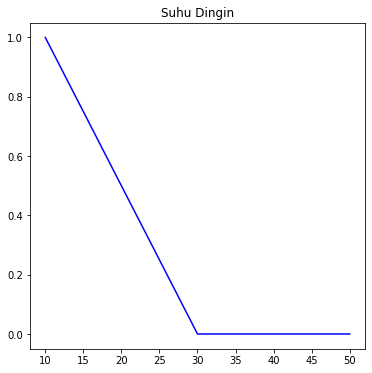

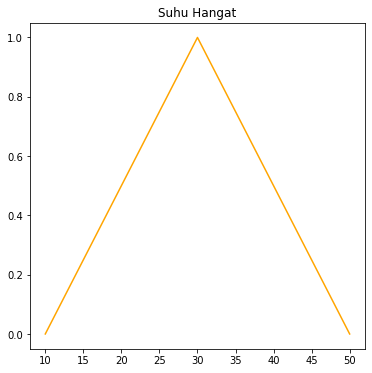

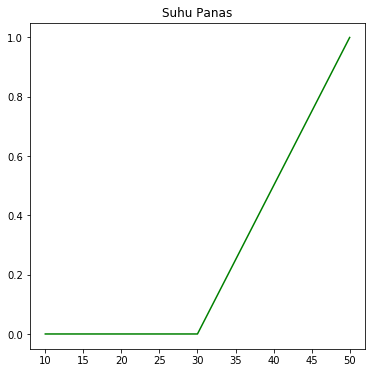

In [4]:
suhu_dingin = fuzz.trimf(suhu_x,[10,10,30])
suhu_hangat = fuzz.trimf(suhu_x,[10,30,50])
suhu_panas = fuzz.trimf(suhu_x,[30,50,50])

fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
fig2, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))

ax0.plot(suhu_x,suhu_dingin,'blue')
ax0.set_title('Suhu Dingin')
ax1.plot(suhu_x,suhu_hangat,'orange')
ax1.set_title('Suhu Hangat')
ax2.plot(suhu_x, suhu_panas,'green')
ax2.set_title('Suhu Panas')

Menampilkan Plotting ketiga fungsi keanggotaan SUHU

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


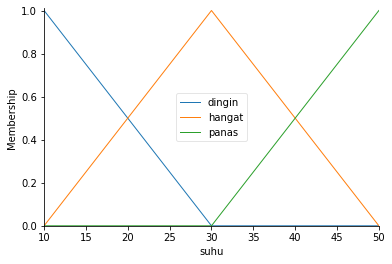

In [5]:
suhu.view()

## Fuzzifikasi Asap 
Untuk Asap (sensor tegangan/ Vout), fungsi keanggotaan dibagi menjadi 3 bagian :

Asap tersebut dinyatakan sedikit ketika mempunyai nilai tegangan 1 - 3V.

Asap tersebut dinyatakan cukup ketika mempunyai nilai kelembaban 2 - 4V.

Asap tersebut dinyatakan pekat ketika mempunyai nilai kelembaban 3 - 5V.

Nilai Linguistik pada Variabel Asap ada 3, yaitu:
- Asap Sedikit
$$ Asap Sedikit [x] = 
\begin{cases}
    \frac{(3-x)}{(3-1)} & ; 1 \leq  x \leq\ 3 \\
    0 & ; x \geq 3
\end{cases}
$$

- Asap Cukup
$$ Asap Cukup [x] = 
\begin{cases}
    0 & ; x \leq 3\\
    \frac{(x-1)}{(3-1)} & ; 1 \leq x \leq\ 3 \\
    \frac{(5-x)}{(5-3)} & ; 3 \leq  x \leq\ 5 \\
    0 & ; x \geq 3
\end{cases}
$$

- Asap Pekat
$$ Asap Pekat [x] = 
\begin{cases}
    0 & ; x \leq 5\\
    \frac{(x-3)}{(5-3)} & ; 3 \leq x \leq\ 5 \\
\end{cases}
$$

### Plotting fungsi keanggotaan ASAP 
$\mu AsapSedikit(x)$ , $\mu AsapCukup(x)$ , $\mu AsapPekat(x)$

Text(0.5, 1.0, 'Asap Pekat')

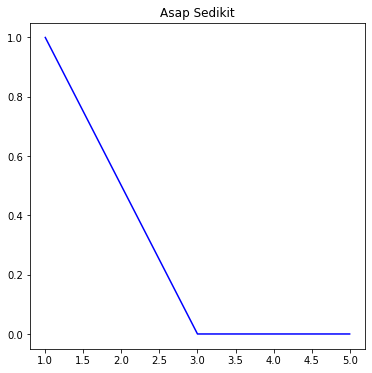

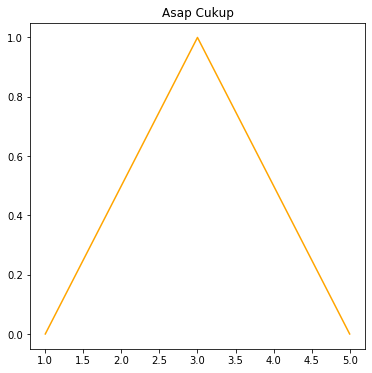

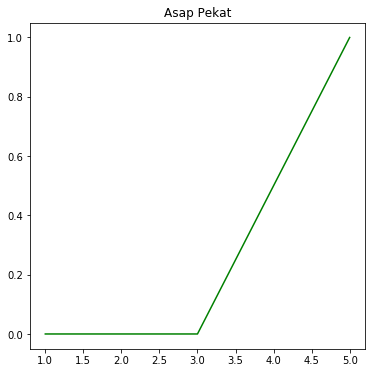

In [6]:
asap_sedikit = fuzz.trimf(asap_x,[1, 1, 3])
asap_cukup = fuzz.trimf(asap_x,[1, 3, 5])
asap_pekat = fuzz.trimf(asap_x,[3, 5, 5])

fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
fig2,(ax1) = plt.subplots(nrows=1,figsize=(6,6))
fig3,(ax2) = plt.subplots(nrows=1,figsize=(6,6))

ax0.plot(asap_x, asap_sedikit,'blue')
ax0.set_title('Asap Sedikit')
ax1.plot(asap_x, asap_cukup,'orange')
ax1.set_title('Asap Cukup')
ax2.plot(asap_x, asap_pekat,'green')
ax2.set_title('Asap Pekat')

Menampilkan Plotting ketiga fungsi keanggotaan ASAP 

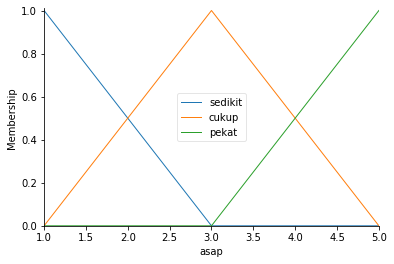

In [7]:
asap.view()

Nilai Linguistik pada Variabel Penyemprotan ada 3, yaitu:
- Penyemprotan Sedikit
$$ Penyemprotan Sedikit [x] = 
\begin{cases}
    0 & ; x \leq 1\\
    \frac{(x-1)}{(65-1)} & ;1 \leq x \leq\ 65 \\
    \frac{(125-x)}{(125-65)} & ; 65 \leq  x \leq\ 125 \\
    0 & ; x \geq 125
\end{cases}
$$

- Penyemprotan Cukup
$$ Penyemprotan Cukup [x] = 
\begin{cases}
    0 & ; x \leq 65\\
    \frac{(x-65)}{(125-65)} & ;65 \leq x \leq\ 125 \\
    \frac{(185-x)}{(185-125)} & ; 125 \leq  x \leq\ 185 \\
    0 & ; x \geq 185
\end{cases}
$$

- Penyemprotan Banyak
$$ Penyemprotan Banyak [x] = 
\begin{cases}
    0 & ; x \leq 125\\
    \frac{(x-125)}{(185-125)} & ;125 \leq x \leq\ 250 \\
    \frac{(250-x)}{(250-185)} & ; 185 \leq  x \leq\ 250 \\
    0 & ; x \geq 250
\end{cases}
$$

## Fuzzifikasi Penyeprotan Air
Diberi nama variabel Penyemprotan dengan rentang Volume Air 1- 250 dibagi menjadi 3 fungsi keanggotaan yakni:
1. Sedikit = 1 - 125
2. Cukup = 65 - 185
3. Banyak = 125 - 250

### Plotting fungsi keanggotaan PENYEMPROTAN AIR
$\mu PenyemprotanSedikit(x)$ , $\mu PenyemprotanCukup(x)$ , $\mu PenyemprotanBanyak(x)$

Text(0.5, 1.0, 'Penyemprotan Banyak')

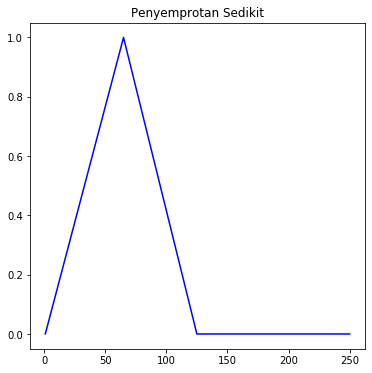

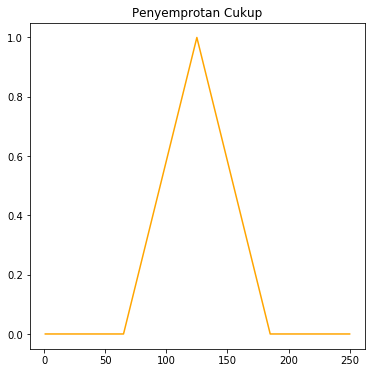

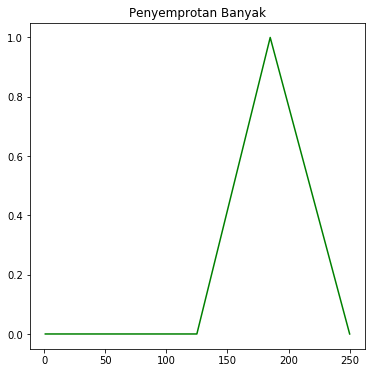

In [8]:
penyemprotan_sedikit = fuzz.trimf(penyemprotan_x,[1, 65, 125])
penyemprotan_cukup = fuzz.trimf(penyemprotan_x,[65, 125, 185])
penyemprotan_banyak = fuzz.trimf(penyemprotan_x,[125, 185, 250])

fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
fig2,(ax1) = plt.subplots(nrows=1,figsize=(6,6))
fig3,(ax2) = plt.subplots(nrows=1,figsize=(6,6))

ax0.plot(penyemprotan_x, penyemprotan_sedikit,'blue')
ax0.set_title('Penyemprotan Sedikit')
ax1.plot(penyemprotan_x, penyemprotan_cukup,'orange')
ax1.set_title('Penyemprotan Cukup')
ax2.plot(penyemprotan_x, penyemprotan_banyak,'green')
ax2.set_title('Penyemprotan Banyak')

Menampilkan Plotting ketiga fungsi keanggotaan PENYEMPROTAN

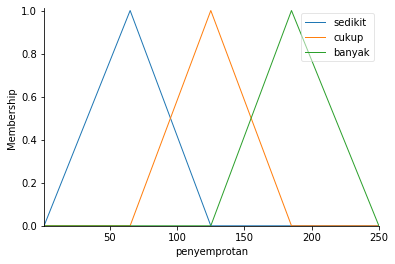

In [9]:
penyemprotan.view()

<h1 align = "center">RULES EVALUATION <a class="anchor" id="rules"></a>

Pada tahap ini, akan membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel suhu yang berjumlah 3 dan fuzzifikasi dari variabel asap yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

Input SUHU & ASAP | DINGIN(D) | HANGAT(H) | PANAS(P)
------ | --- | --- | ---
SEDIKIT(S) | SEDIKIT(S1) | SEDIKIT(S1) | CUKUP(C1
CUKUP(C) | CUKUP(S1) | CUKUP(C1) | BANYAK(B1)
PEKAT(Pk)| BANYAK(B1) | BANYAK(B1) | BANYAK(B1)

Dari Tabel tersebut dapat dibentuk Rules:

1. IF Suhu = D Dan Asap = S THEN Penyemprotan = S1
2. IF Suhu = D Dan Asap = C THEN Penyemprotan = C1
3. IF Suhu = D Dan Asap = Pk THEN Penyemprotan = B1

4. IF Suhu = H Dan Asap = S THEN Penyemprotan = S1
5. IF Suhu = H Dan Asap = C THEN Penyemprotan = C1
6. IF Suhu = H Dan Asap = Pk THEN Penyemprotan = B1

7. IF Suhu = P Dan Asap = S THEN Penyemprotan = C1
8. IF Suhu = P Dan Asap = C THEN Penyemprotan = B1
9. IF Suhu = P Dan Asap = Pk THEN Penyemprotan = B1

In [10]:
rule1 = ctrl.Rule(suhu['dingin'] & asap['sedikit'], penyemprotan['sedikit'])
rule2 = ctrl.Rule(suhu['dingin'] & asap['cukup'], penyemprotan['cukup'])
rule3 = ctrl.Rule(suhu['dingin'] & asap['pekat'], penyemprotan['banyak'])

rule4 = ctrl.Rule(suhu['hangat'] & asap['sedikit'], penyemprotan['sedikit'])
rule5 = ctrl.Rule(suhu['hangat'] & asap['cukup'], penyemprotan['cukup'])
rule6 = ctrl.Rule(suhu['hangat'] & asap['pekat'], penyemprotan['banyak'])

rule7 = ctrl.Rule(suhu['panas'] & asap['sedikit'], penyemprotan['cukup'])
rule8 = ctrl.Rule(suhu['panas'] & asap['cukup'], penyemprotan['banyak'])
rule9 = ctrl.Rule(suhu['panas'] & asap['pekat'], penyemprotan['banyak'])

<h1 align = "center">MEKANISME INFERENSI <a class="anchor" id="defuzz"></a>

Menggunakan Library `skfuzzy` dari import control `ctrl`

In [11]:
penyemprotan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,])

<h1 align = "center">DEFUZZIFIKASI

In [12]:
semprot = ctrl.ControlSystemSimulation(penyemprotan_ctrl)

Input suhu kita masukan 10-50 dan asap 1-5

In [13]:
semprot.input['suhu'] = 35
semprot.input['asap'] = 5

Melakukan Perhitungan Defuzzifikasi secara Otomatis

In [14]:
semprot.compute()

Mencetak dan menampilkan hasil perhitungan Defuzzifikasi

In [15]:
print (semprot.output['penyemprotan'])

186.75000000000003


Plotting fungsi keangggotaan Suhu setelah dimasukkan input nilai pada Suhu

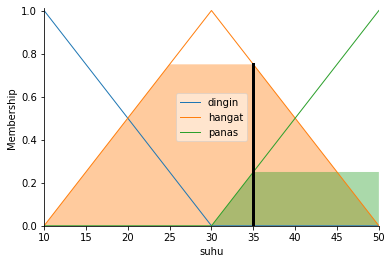

In [16]:
suhu.view(sim=semprot)

Plotting fungsi keangggotaan Asap setelah dimasukkan input nilai pada Asap

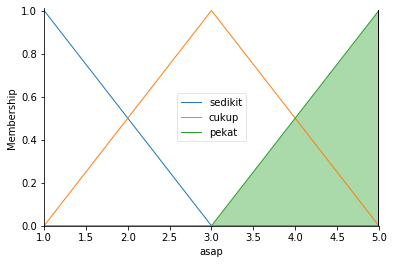

In [17]:
asap.view(sim=semprot)

Plotting fungsi keangggotaan Penyemprotan Air setelah dimasukkan input nilai pada Penyemprotan Air 

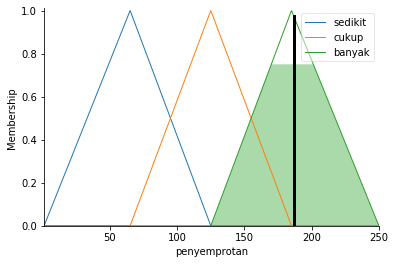

In [18]:
penyemprotan.view(sim=semprot)

<h1 align = "center">PERHITUNGAN MANUAL <a class="anchor" id="manual"></a>

### CONTOH SOAL

Berapakah Volume Penyemprotan Air jika Suhu = 35 Derajat Celcius dan Asap = 5 Vout?

Volume Penyemprotan Air
1. Sedikit = 1 - 125
2. Cukup = 65 - 185
3. Banyak = 125 - 250

**Himpunan Suhu** 

- $\mu Hangat[35]=(\frac{40-35}{40-20})=\frac{5}{20}=0.25$ <br>
- $\mu Panas[35]=(\frac{35-20}{40-20})=\frac{15}{20}=0.75$ <br>

**Himpunan Asap**

- $\mu Cukup[5]=(\frac{5-5}{5-3})=\frac{0}{3}=0$ <br>
- $\mu Pekat[5]=(\frac{5-3}{5-3})=\frac{2}{2}=1$ <br>

Rule Evaluation

IF SUHU = H, DAN ASAP = C, THEN PENYEMPROTAN = C1 <br>
$\alpha 5 = \mu SUHU \bigcap \mu ASAP = min(\mu H[35], \mu C[5]) = min [0.25;0] = 0$

IF SUHU = H, DAN ASAP = Pk, THEN PENYEMPROTAN= B1 <br>
$\alpha 6 = \mu SUHU \bigcap \mu ASAP = min(\mu H[35], \mu Pk[5]) = min [0.25;1] = 0.25$

IF SUHU = P, DAN ASAP = C, THEN PENYEMPROTAN= B1 <br>
$\alpha 8 = \mu SUHU \bigcap \mu ASAP = min(\mu P[35], \mu C[5]) = min [0.75;0] = 0$

IF SUHU = P, DAN ASAP = Pk, THEN PENYEMPROTAN= B1 <br>
$\alpha 9 = \mu SUHU \bigcap \mu ASAP = min(\mu P[35], \mu Pk[5]) = min [0.75;1] = 0.75$

**AGREGASI DAN DEFUZZIFIKASI**

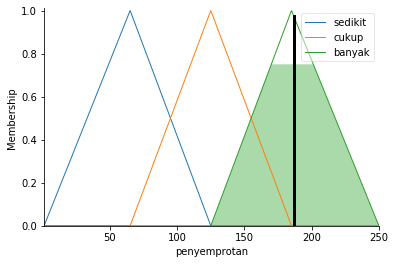

In [19]:
penyemprotan.view(sim=semprot)

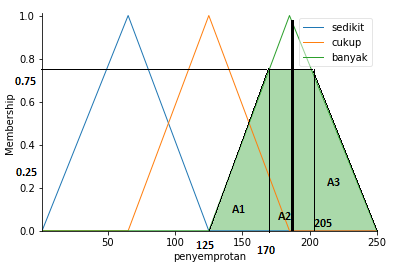

Dari Gambar diatas, maka didapatlah rentang gambar segitiga dan persegi
dan disimbolkan dengan huruf A

Rumus:

<font size = 3>
$$
Hasil = \frac {\sum XiAi}{\sum Ai}
$$
</font>

Untuk mencari nilai A maka:

menggunakan rumus
$A = P x L$ untuk persegi panjang dan untuk menggunakan rumus $A = \frac {1}{2} (P x L)$ untuk segitiga.

Rentang Nilai A
$$A1 = 125 - 170 \ gambar \ \triangle$$
$$A2 = 170 - 205 \ gambar \ \square$$
$$A3 = 205 - 250 \ gambar \ \triangle$$

Mencari nilai A1

$
A1 = \frac {1}{2} (P \times L) \\
A1 = 0.5 (45 \times 0.75) \\ 
A1 = 16.875 \\
$

Mencari nilai A2

$
A2 = P \times L \\
A2 = (35) \times (0.75) \\ 
A2 = 26.25 \\
$

Mencari nilai A3

$
A3 = \frac {1}{2} (P \times L) \\
A3 = 0.5 (45 \times 0.75) \\ 
A3 = 16.875 \\
$

Untuk mencari nilai X:\
menggunakan rumus $X = a + \frac{2}{3}(b-a)$ untuk segitiga Atas/sisi kiri dan
\$X = a + \frac{1}{3}(b-a)$ untuk segitiga Bawah/sisi kanan.

sedangkan untuk persegi panjang menggunakan rumus $X = \frac{1}{2}(b+a)$

**Keterangan**
- b = Batas atas
- a = Batas bawah

Mencari nilai X1

$
X1 = a +\frac{2}{3} (b - a) \\
X1 = 125 + \frac{2}{3} (170 - 125) \\ 
X1 = 125 + \frac{2}{3} (45) \\ 
X1 = 125 + \frac{90}{3} \\
X1 = 125 + 30‬\\
X1 = 155\\
$

Mencari nilai X2

$
X2 = \frac{1}{2}(b+a) \\
X2 = \frac{1}{2}(170 + 205) \\ 
X2 = \frac{375}{2} \\
X2 = 187.5\\
$

Mencari nilai X3

$
X3 = a +\frac{1}{3} (b - a) \\
X3 = 205 + \frac{1}{3} (250 - 205) \\ 
X3 = 205 + \frac{1}{3} (45) \\ 
X3 = 205 + \frac{45}{3} \\
X3 = 205 + 15\\
X3 = 220\\
$

Setelah nilai A dan X didapatkan maka selanjutnya adalah memasukan nya kedalam rumus utama.

$$Hasil = \frac{\sum XiAi}{\sum Ai}$$

$$Hasil = \frac{(X1 \times A1) + (X2 \times A2) + (X3 \times A3)}{A1 + A2 + A3}$$

$$Hasil = \frac{(155 \times 16.875) + (187.5 \times 26.25) + (220 \times 16.875)}{16.875 + 26.25 + 16.875}$$

$$Hasil = \frac{(2615.625) + (4921.875‬) + (3712.5‬‬)}{60}$$

$$Hasil = \frac{11250}{60}$$

$$Hasil = 187.5$$

### Analisa hasil
Hasil output yang didapatkan adalah 187.5 dengan menggunakan perhitungan manual sedangkan perhitungan otomatia pada python, output yang didapatkan adalah = 186.75000000000003. 

Maka diketahuilah (selisih perhitungan manual dan otomatis) dengan perbedaan:
$
Selisih = 187.5 + 186.75000000000003\\
Selisih = 0.75
$

Selisih tersebut terjadi disebabkan oleh beberapa digit angka dibelakang koma, maka menyebabkan sedikit selisih angka antara perhitungan manual dan perhitungan otomatis pada python.

<h1 align = "center">TERIMA KASIH